<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="archaea"
dataset = 3
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6     X7     X8      X9  \
0     4.237  7.627  2.542  5.932  0.000  15.254  3.390  7.627  1.695   5.085   
1    19.792  5.208  2.083  5.208  2.083   0.000  2.083  9.375  1.042   7.292   
2     6.486  4.324  5.946  3.243  2.162   5.405  2.162  9.730  0.541   7.027   
3     8.108  5.405  4.054  4.054  4.054  13.514  1.351  5.405  1.351   9.459   
4     2.874  4.598  6.322  5.172  1.149   7.471  1.149  6.322  3.448  12.069   
..      ...    ...    ...    ...    ...     ...    ...    ...    ...     ...   
995  10.569  6.504  4.065  8.943  0.813   8.943  0.813  6.504  0.000  10.569   
996  11.610  6.367  1.873  9.738  0.000   8.614  1.498  9.738  1.498   2.247   
997  15.672  5.970  1.493  7.463  0.746   3.731  1.493  8.209  3.731   1.493   
998   8.397  6.107  4.580  8.397  1.527   9.924  8.397  5.344  2.290   2.290  

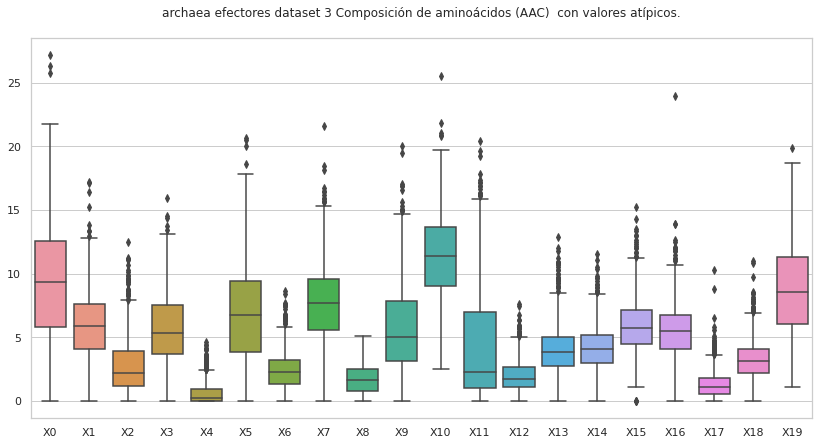

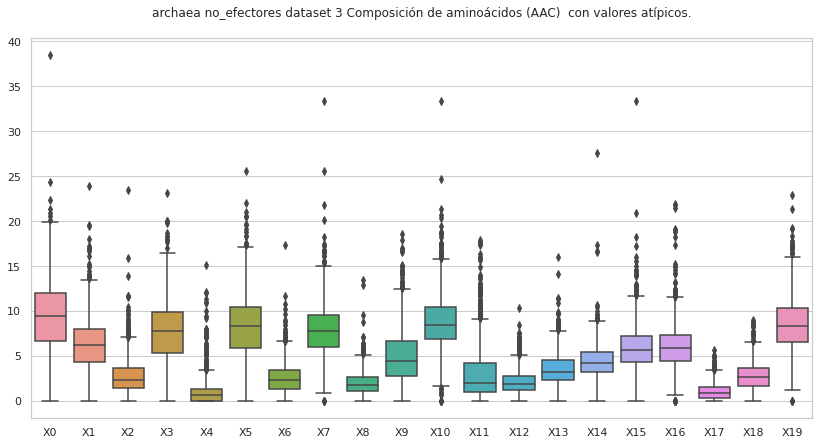

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2      X3     X4      X5     X6     X7     X8      X9  \
0     4.237  7.627  2.542   5.932  0.000  15.254  3.390  7.627  1.695   5.085   
2     6.486  4.324  5.946   3.243  2.162   5.405  2.162  9.730  0.541   7.027   
5     9.677  9.677  3.226  10.753  0.000   7.527  1.075  8.602  3.226   5.376   
6     3.378  3.378  4.730   4.730  0.676   8.784  4.054  3.378  1.351   5.405   
7    12.613  5.405  1.351   6.306  0.000   3.604  4.054  9.910  1.802   6.306   
..      ...    ...    ...     ...    ...     ...    ...    ...    ...     ...   
993  14.627  3.881  2.090  12.239  0.299   7.463  2.687  5.672  1.194   3.881   
995  10.569  6.504  4.065   8.943  0.813   8.943  0.813  6.504  0.000  10.569   
996  11.610  6.367  1.873   9.738  0.000   8.614  1.498  9.738  1.498   2.247   
997  15.672  5.970  1.493   7.463  0.746   3.731  1.493  8.209  3.73

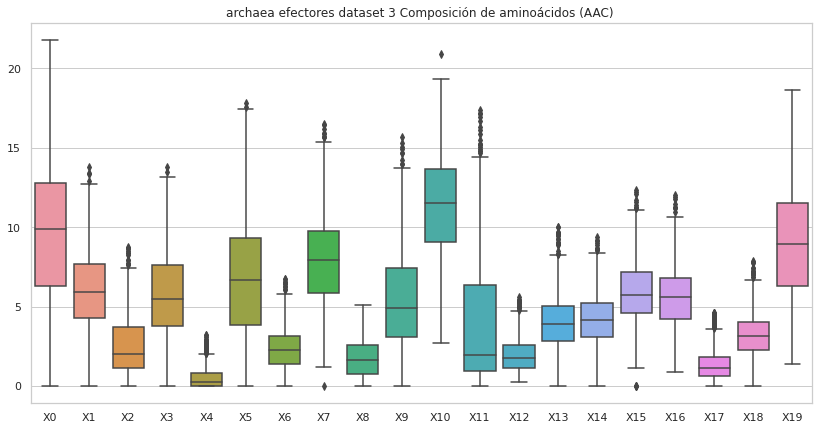

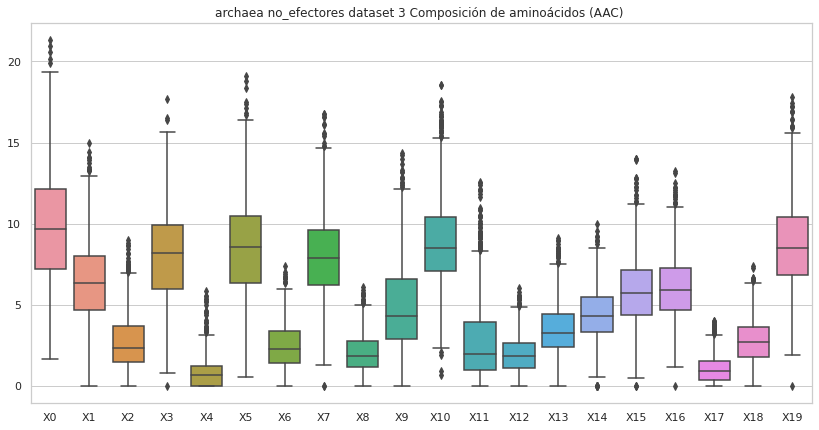

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.021143  0.000000  0.029600  0.076113  0.016914  0.038057  0.008457   
1    0.029124  0.003066  0.007664  0.000000  0.007664  0.013795  0.001533   
2    0.027553  0.009184  0.013777  0.022961  0.032146  0.041330  0.002296   
3    0.029836  0.014918  0.014918  0.049726  0.000000  0.019891  0.004973   
4    0.025475  0.010190  0.045854  0.066234  0.061139  0.056044  0.030570   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.066206  0.005093  0.056021  0.056021  0.020371  0.040742  0.000000   
996  0.028940  0.000000  0.024272  0.021472  0.002801  0.024272  0.003734   
997  0.025420  0.001210  0.012105  0.006052  0.009684  0.013315  0.006052   
998  0.086366  0.015703  0.086366  0.102069  0.039257  0.054960  0.023554   
999  0.00

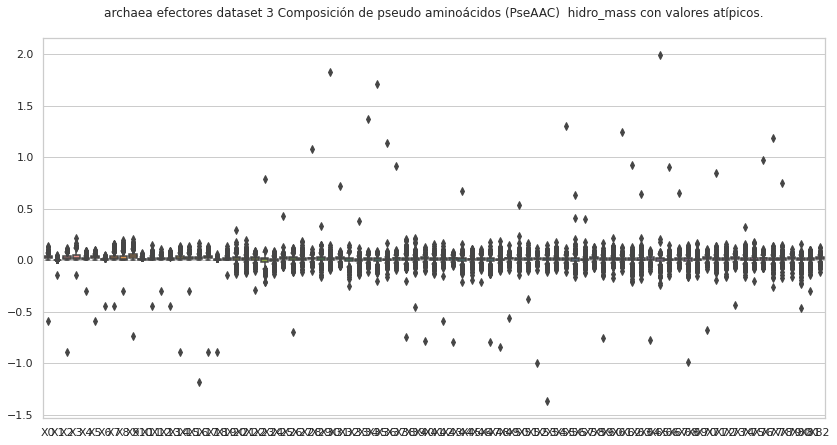

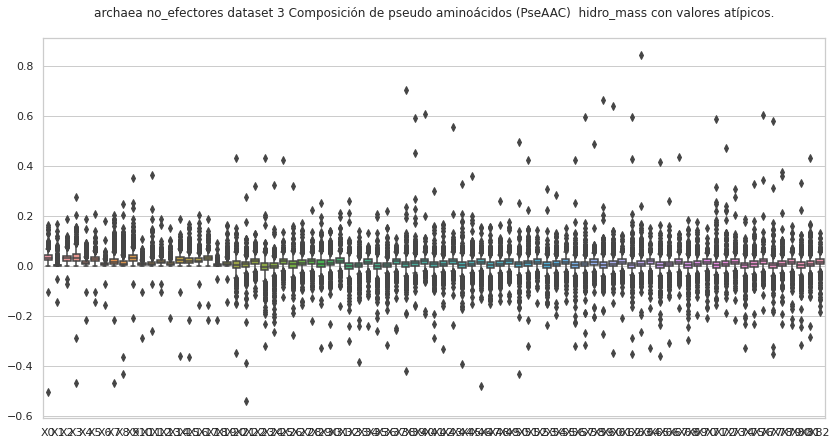

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.021143  0.000000  0.029600  0.076113  0.016914  0.038057  0.008457   
1    0.029124  0.003066  0.007664  0.000000  0.007664  0.013795  0.001533   
2    0.027553  0.009184  0.013777  0.022961  0.032146  0.041330  0.002296   
3    0.029836  0.014918  0.014918  0.049726  0.000000  0.019891  0.004973   
5    0.044469  0.000000  0.049409  0.034587  0.009882  0.039528  0.014823   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.040832  0.000833  0.034165  0.020832  0.005000  0.015833  0.003333   
994  0.031923  0.000000  0.012492  0.006940  0.020820  0.023596  0.011104   
995  0.066206  0.005093  0.056021  0.056021  0.020371  0.040742  0.000000   
996  0.028940  0.000000  0.024272  0.021472  0.002801  0.024272  0.003734   
997  0.02

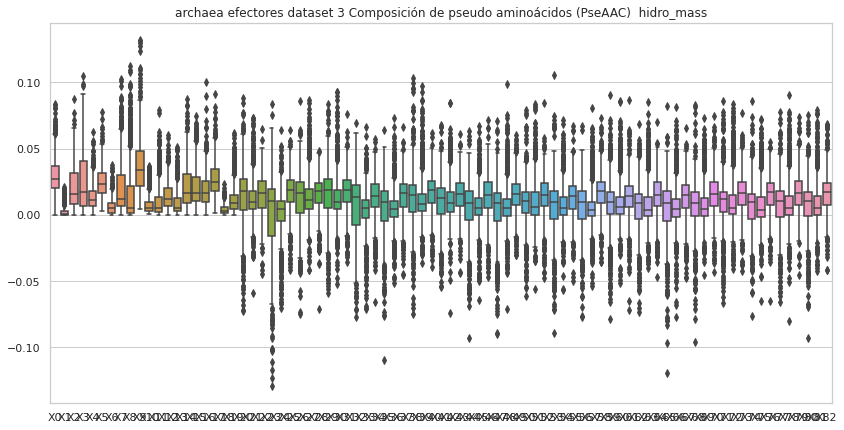

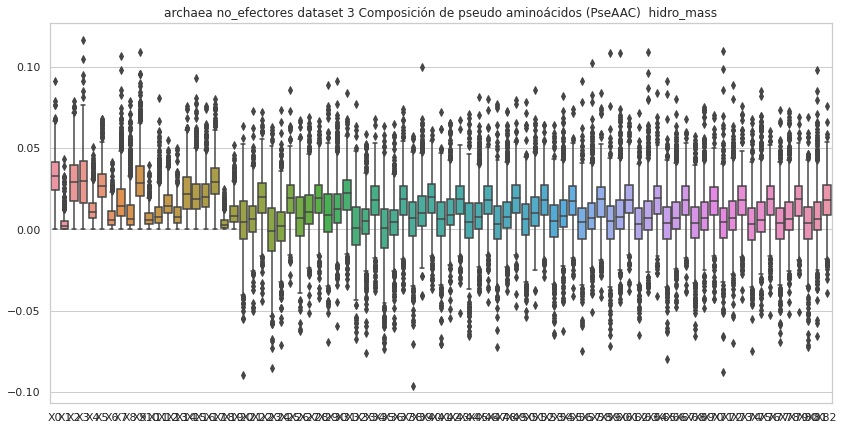

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.039202  0.000000  0.054883  0.141128  0.031362  0.070564  0.015681   
1    0.038610  0.004064  0.010161  0.000000  0.010161  0.018289  0.002032   
2    0.047420  0.015807  0.023710  0.039516  0.055323  0.071130  0.003952   
3    0.037934  0.018967  0.018967  0.063223  0.000000  0.025289  0.006322   
4    0.029512  0.011805  0.053121  0.076731  0.070828  0.064926  0.035414   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.065732  0.005056  0.055619  0.055619  0.020225  0.040450  0.000000   
996  0.033479  0.000000  0.028079  0.024839  0.003240  0.028079  0.004320   
997  0.042643  0.002031  0.020306  0.010153  0.016245  0.022337  0.010153   
998  0.083283  0.015142  0.083283  0.098425  0.037856  0.052998  0.022714   
999  0.018537  

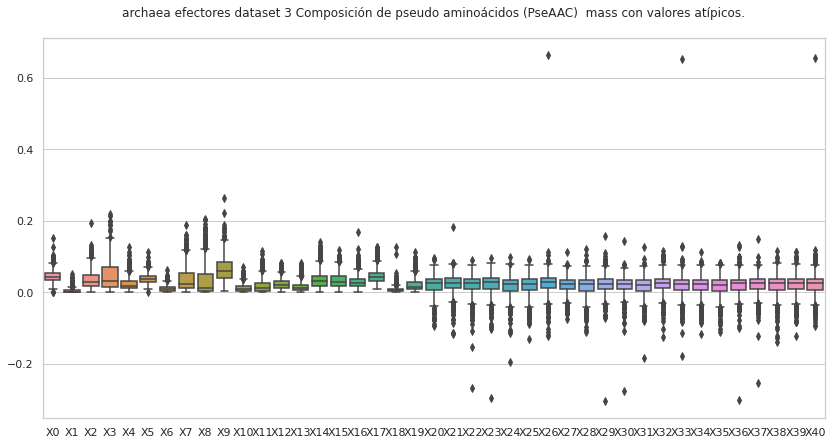

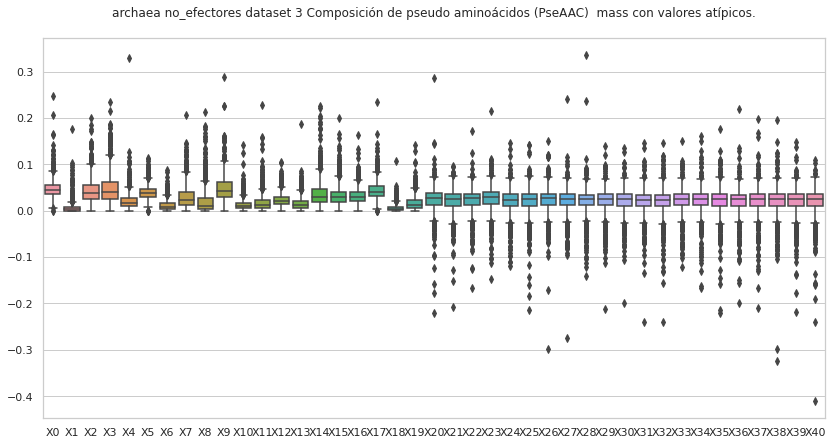

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
1    0.038610  0.004064  0.010161  0.000000  0.010161  0.018289  0.002032   
2    0.047420  0.015807  0.023710  0.039516  0.055323  0.071130  0.003952   
3    0.037934  0.018967  0.018967  0.063223  0.000000  0.025289  0.006322   
5    0.051240  0.000000  0.056934  0.039853  0.011387  0.045547  0.017080   
7    0.046558  0.000000  0.023279  0.013302  0.014965  0.036581  0.006651   
..        ...       ...       ...       ...       ...       ...       ...   
991  0.038229  0.002249  0.015741  0.013493  0.013493  0.037479  0.005247   
993  0.048441  0.000989  0.040532  0.024715  0.005932  0.018783  0.003954   
995  0.065732  0.005056  0.055619  0.055619  0.020225  0.040450  0.000000   
996  0.033479  0.000000  0.028079  0.024839  0.003240  0.028079  0.004320   
997  0.042643  0.002031  

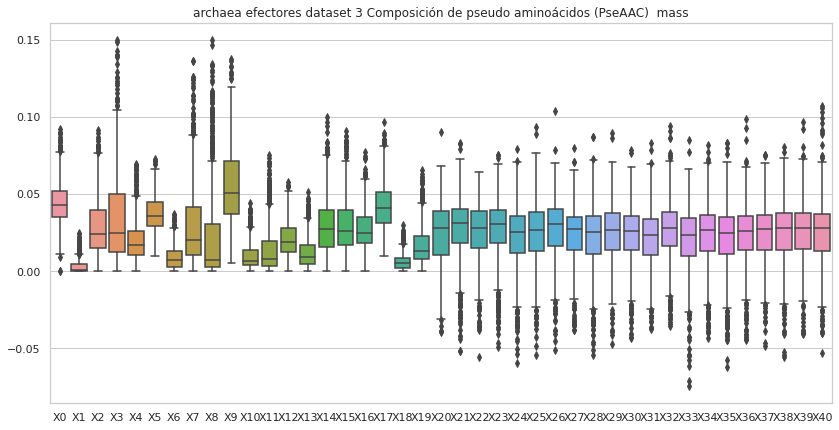

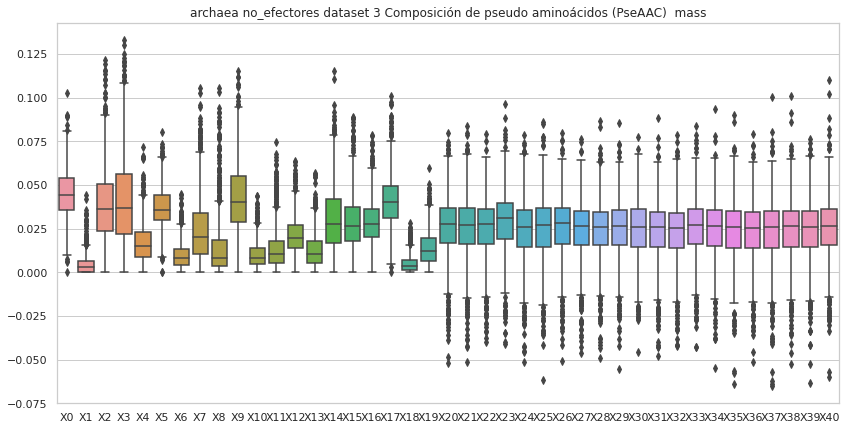

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.022032  0.000000  0.030844  0.079314  0.017625  0.039657  0.008813   
1    0.074133  0.007803  0.019509  0.000000  0.019509  0.035116  0.003902   
2    0.032657  0.010886  0.016328  0.027214  0.038099  0.048985  0.002721   
3    0.051313  0.025656  0.025656  0.085521  0.000000  0.034208  0.008552   
4    0.024894  0.009958  0.044810  0.064725  0.059746  0.054767  0.029873   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.106923  0.008225  0.090473  0.090473  0.032899  0.065799  0.000000   
996  0.075200  0.000000  0.063071  0.055794  0.007277  0.063071  0.009703   
997  0.044904  0.002138  0.021383  0.010691  0.017106  0.023521  0.010691   
998  0.087105  0.015837  0.087105  0.102942  0.039593  0.055430  0.023756   
999  0.007680 

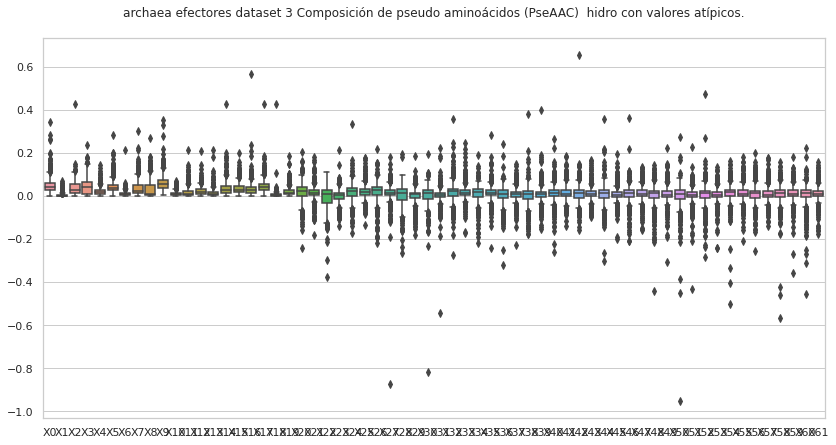

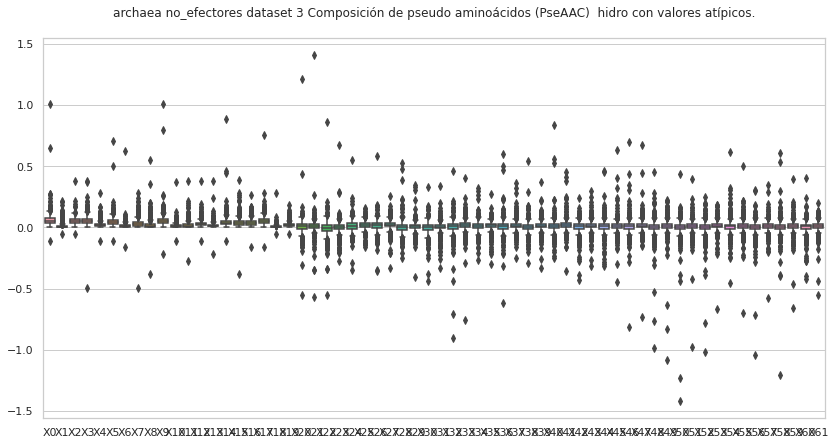

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.022032  0.000000  0.030844  0.079314  0.017625  0.039657  0.008813   
1    0.074133  0.007803  0.019509  0.000000  0.019509  0.035116  0.003902   
2    0.032657  0.010886  0.016328  0.027214  0.038099  0.048985  0.002721   
3    0.051313  0.025656  0.025656  0.085521  0.000000  0.034208  0.008552   
6    0.018577  0.003715  0.026008  0.048301  0.014862  0.018577  0.007431   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.093598  0.001910  0.078317  0.047754  0.011461  0.036293  0.007641   
994  0.035550  0.000000  0.013911  0.007728  0.023185  0.026276  0.012365   
995  0.106923  0.008225  0.090473  0.090473  0.032899  0.065799  0.000000   
996  0.075200  0.000000  0.063071  0.055794  0.007277  0.063071  0.009703   
997  0.044904  0.002

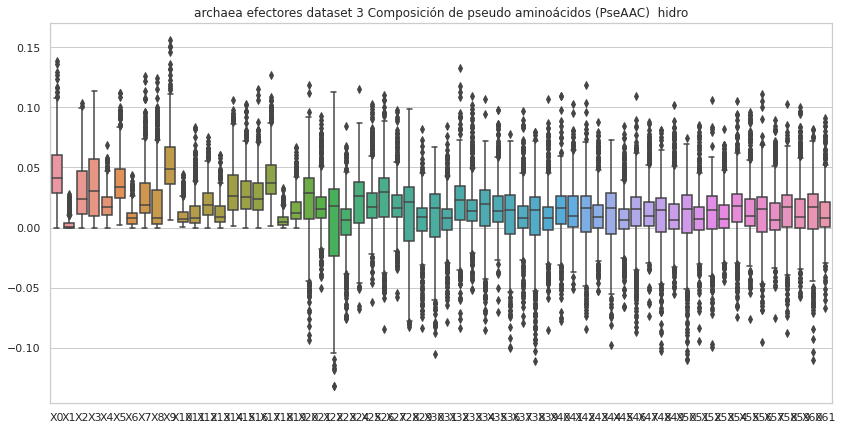

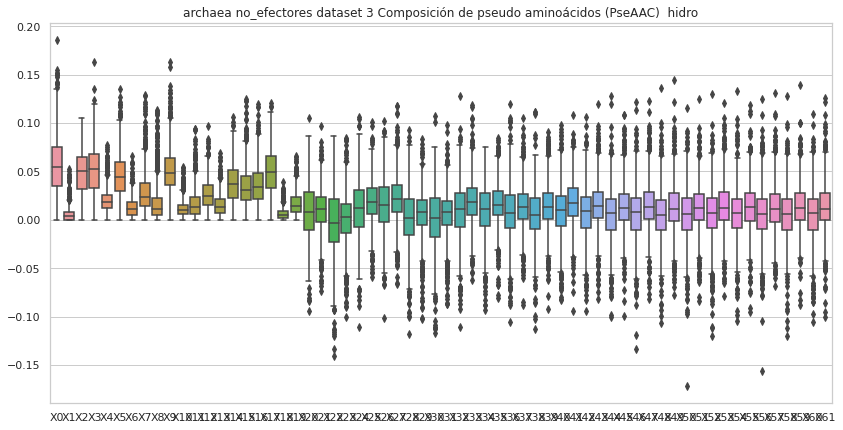

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.114843 -0.196889 -0.044435  0.098150  0.006701 -0.062600 -0.081355   
1   -0.186083 -0.092446  0.045695  0.029906  0.234190 -0.396699  0.088197   
2    0.022518 -0.049605  0.094243 -0.005566 -0.089440 -0.011582  0.100343   
3   -0.039257  0.005039  0.116611  0.039954  0.034853  0.073094  0.005434   
4   -0.073199 -0.016393 -0.076531  0.093333 -0.091301  0.066326 -0.020607   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.074901  0.107089 -0.062123  0.114744 -0.103667  0.004536  0.102645   
996  0.009365  0.081069 -0.005977  0.048423  0.062020  0.081839  0.102280   
997  0.180901  0.146636  0.216451  0.151302  0.227469  0.220173  0.163990   
998  0.050236 -0.080113  0.009945  0.010906 -0.001176 -0.102179 -0.013181   
999 -0.128161 -

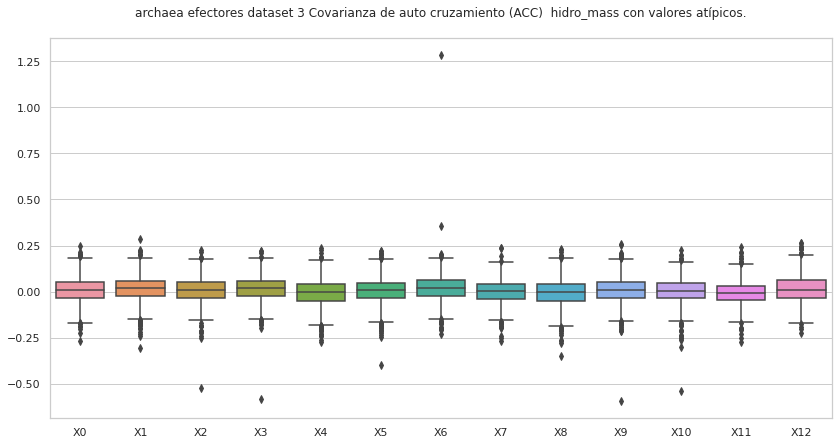

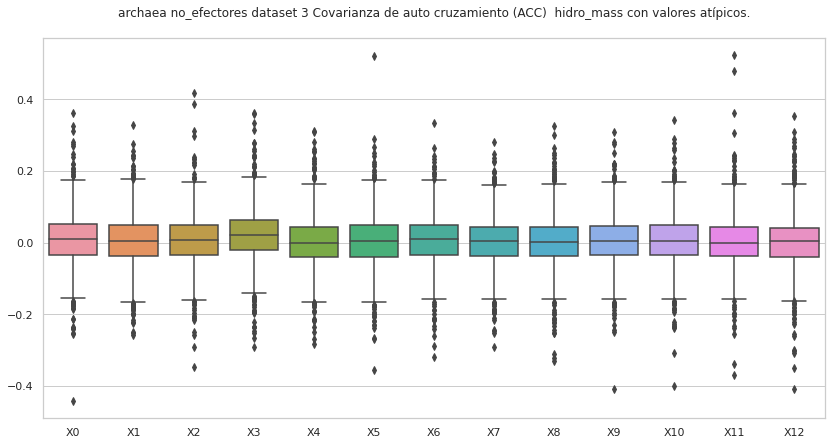

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
2    0.022518 -0.049605  0.094243 -0.005566 -0.089440 -0.011582  0.100343   
3   -0.039257  0.005039  0.116611  0.039954  0.034853  0.073094  0.005434   
4   -0.073199 -0.016393 -0.076531  0.093333 -0.091301  0.066326 -0.020607   
5   -0.099857 -0.088624  0.111897 -0.007385 -0.135371  0.058074  0.157932   
6   -0.006381 -0.080682 -0.027686 -0.023641 -0.098453 -0.010610  0.104092   
..        ...       ...       ...       ...       ...       ...       ...   
992  0.014630 -0.003432 -0.060542  0.125027 -0.011092  0.020385 -0.019435   
993  0.063303 -0.020508  0.042068 -0.038679 -0.014255  0.002170 -0.017359   
995  0.074901  0.107089 -0.062123  0.114744 -0.103667  0.004536  0.102645   
996  0.009365  0.081069 -0.005977  0.048423  0.062020  0.081839  0.102280   
998  0.050236 -

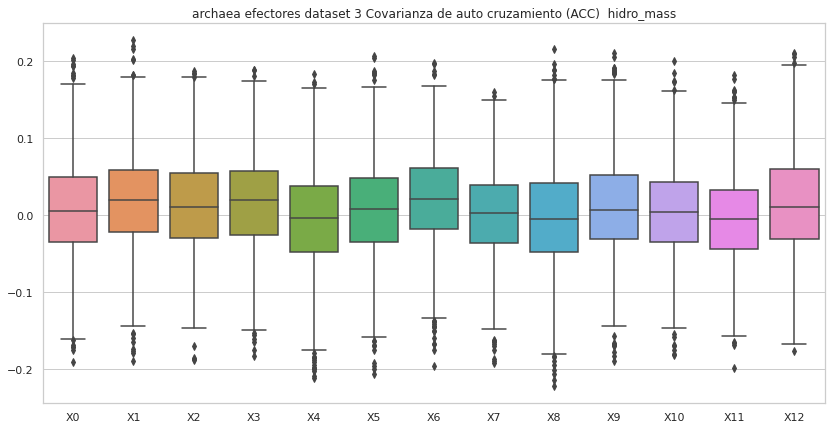

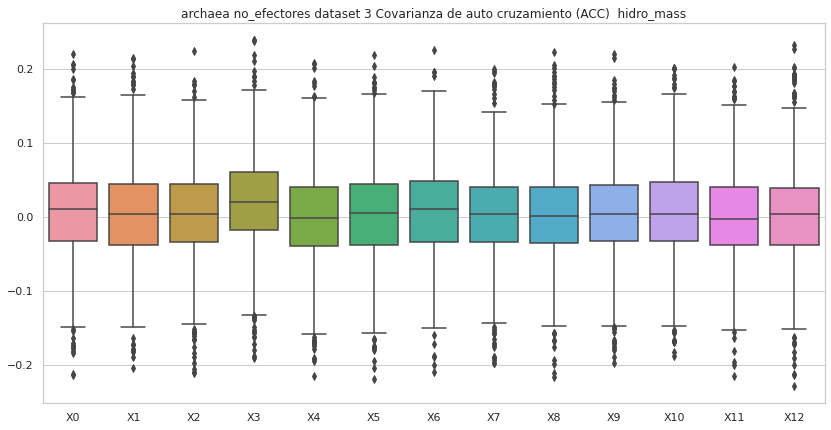

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.114843 -0.196889 -0.044435  0.098150  0.006701 -0.062600 -0.081355   
1   -0.186083 -0.092446  0.045695  0.029906  0.234190 -0.396699  0.088197   
2    0.022518 -0.049605  0.094243 -0.005566 -0.089440 -0.011582  0.100343   
3   -0.039257  0.005039  0.116611  0.039954  0.034853  0.073094  0.005434   
4   -0.073199 -0.016393 -0.076531  0.093333 -0.091301  0.066326 -0.020607   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.074901  0.107089 -0.062123  0.114744 -0.103667  0.004536  0.102645   
996  0.009365  0.081069 -0.005977  0.048423  0.062020  0.081839  0.102280   
997  0.180901  0.146636  0.216451  0.151302  0.227469  0.220173  0.163990   
998  0.050236 -0.080113  0.009945  0.010906 -0.001176 -0.102179 -0.013181   
999 -0.128161 -0.0172

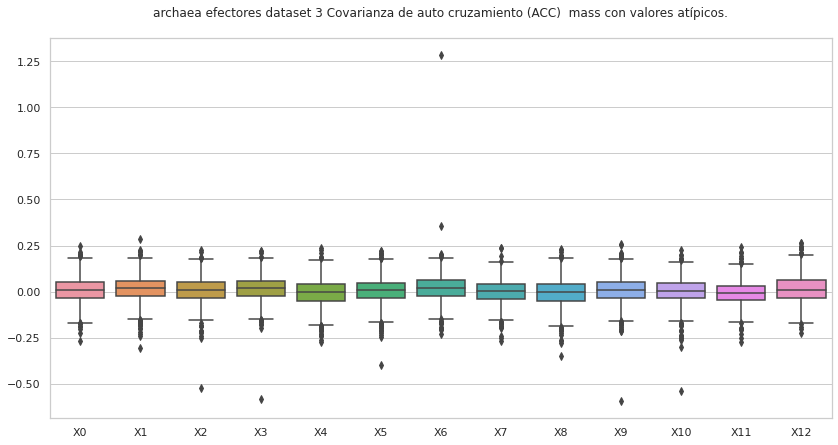

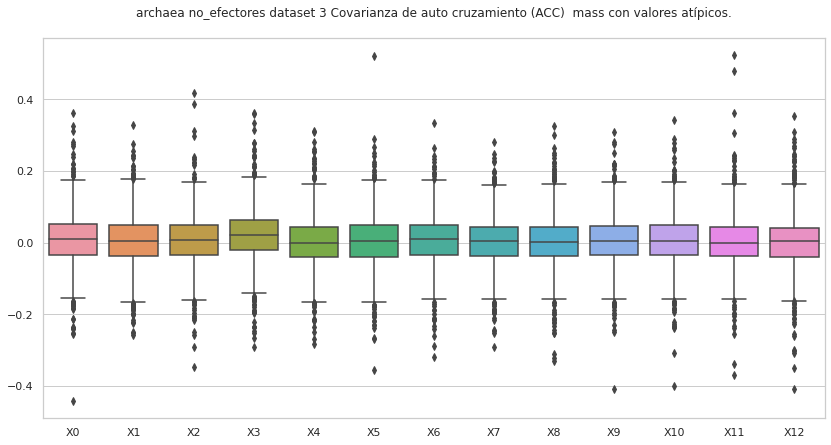

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
2    0.022518 -0.049605  0.094243 -0.005566 -0.089440 -0.011582  0.100343   
3   -0.039257  0.005039  0.116611  0.039954  0.034853  0.073094  0.005434   
4   -0.073199 -0.016393 -0.076531  0.093333 -0.091301  0.066326 -0.020607   
5   -0.099857 -0.088624  0.111897 -0.007385 -0.135371  0.058074  0.157932   
6   -0.006381 -0.080682 -0.027686 -0.023641 -0.098453 -0.010610  0.104092   
..        ...       ...       ...       ...       ...       ...       ...   
992  0.014630 -0.003432 -0.060542  0.125027 -0.011092  0.020385 -0.019435   
993  0.063303 -0.020508  0.042068 -0.038679 -0.014255  0.002170 -0.017359   
995  0.074901  0.107089 -0.062123  0.114744 -0.103667  0.004536  0.102645   
996  0.009365  0.081069 -0.005977  0.048423  0.062020  0.081839  0.102280   
998  0.050236 -0.080113  0.0099

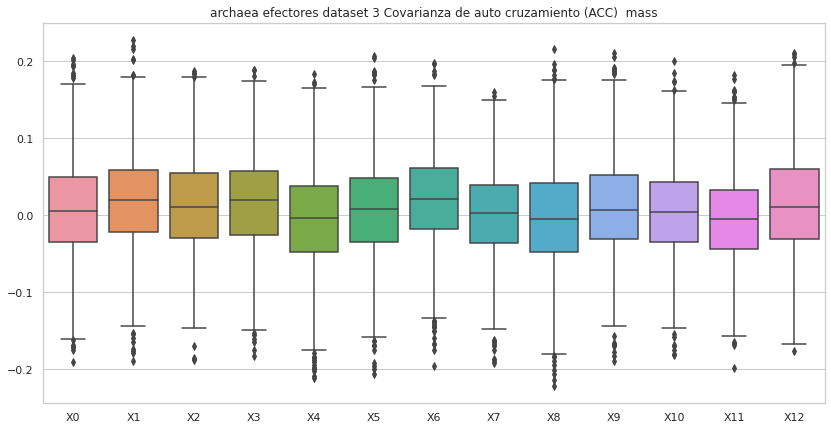

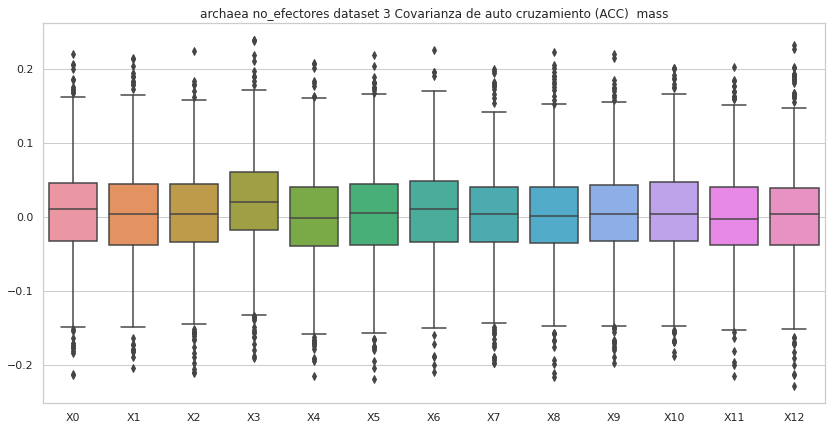

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores archaea dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.125123 -0.014344 -0.121566 -0.063276 -0.015017  0.027330 -0.023358   
1    0.061213  0.133562 -0.029225 -0.025185  0.051441 -0.001130 -0.020975   
2    0.096108  0.063699 -0.048484  0.111859  0.030988  0.017427 -0.025002   
3   -0.047206 -0.001800 -0.115818 -0.046125  0.010053  0.030834 -0.017295   
4   -0.140211 -0.243482 -0.058864  0.085605  0.070412 -0.187966  0.133234   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.011090 -0.090030 -0.094758 -0.034044 -0.094216  0.121375  0.127612   
996 -0.051072 -0.077653 -0.016299 -0.009708 -0.042362 -0.030508 -0.028339   
997 -0.027315  0.028542  0.094072 -0.011935  0.110988 -0.000842  0.083411   
998  0.011200 -0.221969  0.005880  0.197378 -0.130622 -0.098152  0.032837   
999  0.264934  0.028

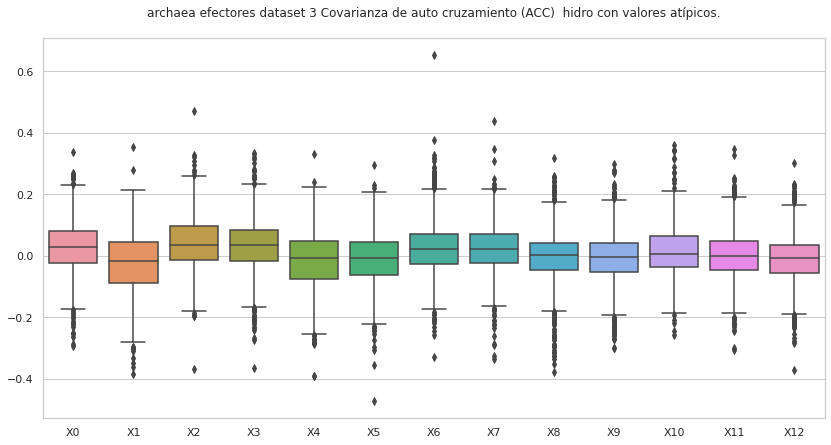

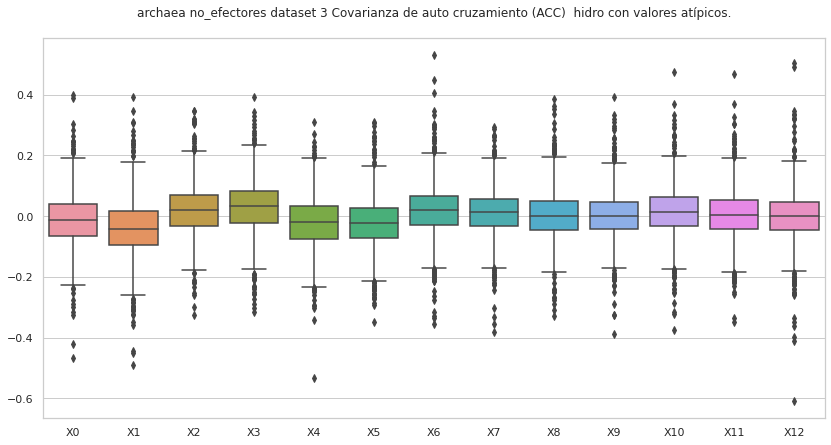

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores archaea dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.125123 -0.014344 -0.121566 -0.063276 -0.015017  0.027330 -0.023358   
1    0.061213  0.133562 -0.029225 -0.025185  0.051441 -0.001130 -0.020975   
2    0.096108  0.063699 -0.048484  0.111859  0.030988  0.017427 -0.025002   
3   -0.047206 -0.001800 -0.115818 -0.046125  0.010053  0.030834 -0.017295   
4   -0.140211 -0.243482 -0.058864  0.085605  0.070412 -0.187966  0.133234   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.011090 -0.090030 -0.094758 -0.034044 -0.094216  0.121375  0.127612   
996 -0.051072 -0.077653 -0.016299 -0.009708 -0.042362 -0.030508 -0.028339   
997 -0.027315  0.028542  0.094072 -0.011935  0.110988 -0.000842  0.083411   
998  0.011200 -0.221969  0.005880  0.197378 -0.130622 -0.098152  0.032837   
999  0.264934  0.028277 -0

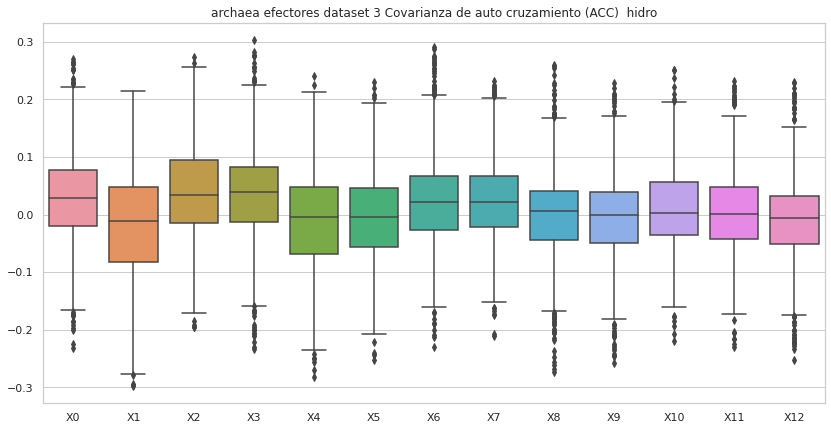

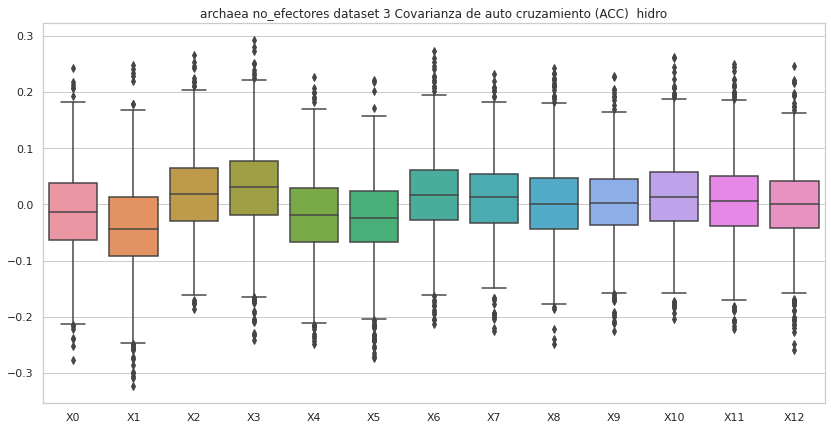

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))